
# Decision Tree & Random Forest

## 1. Decision Tree

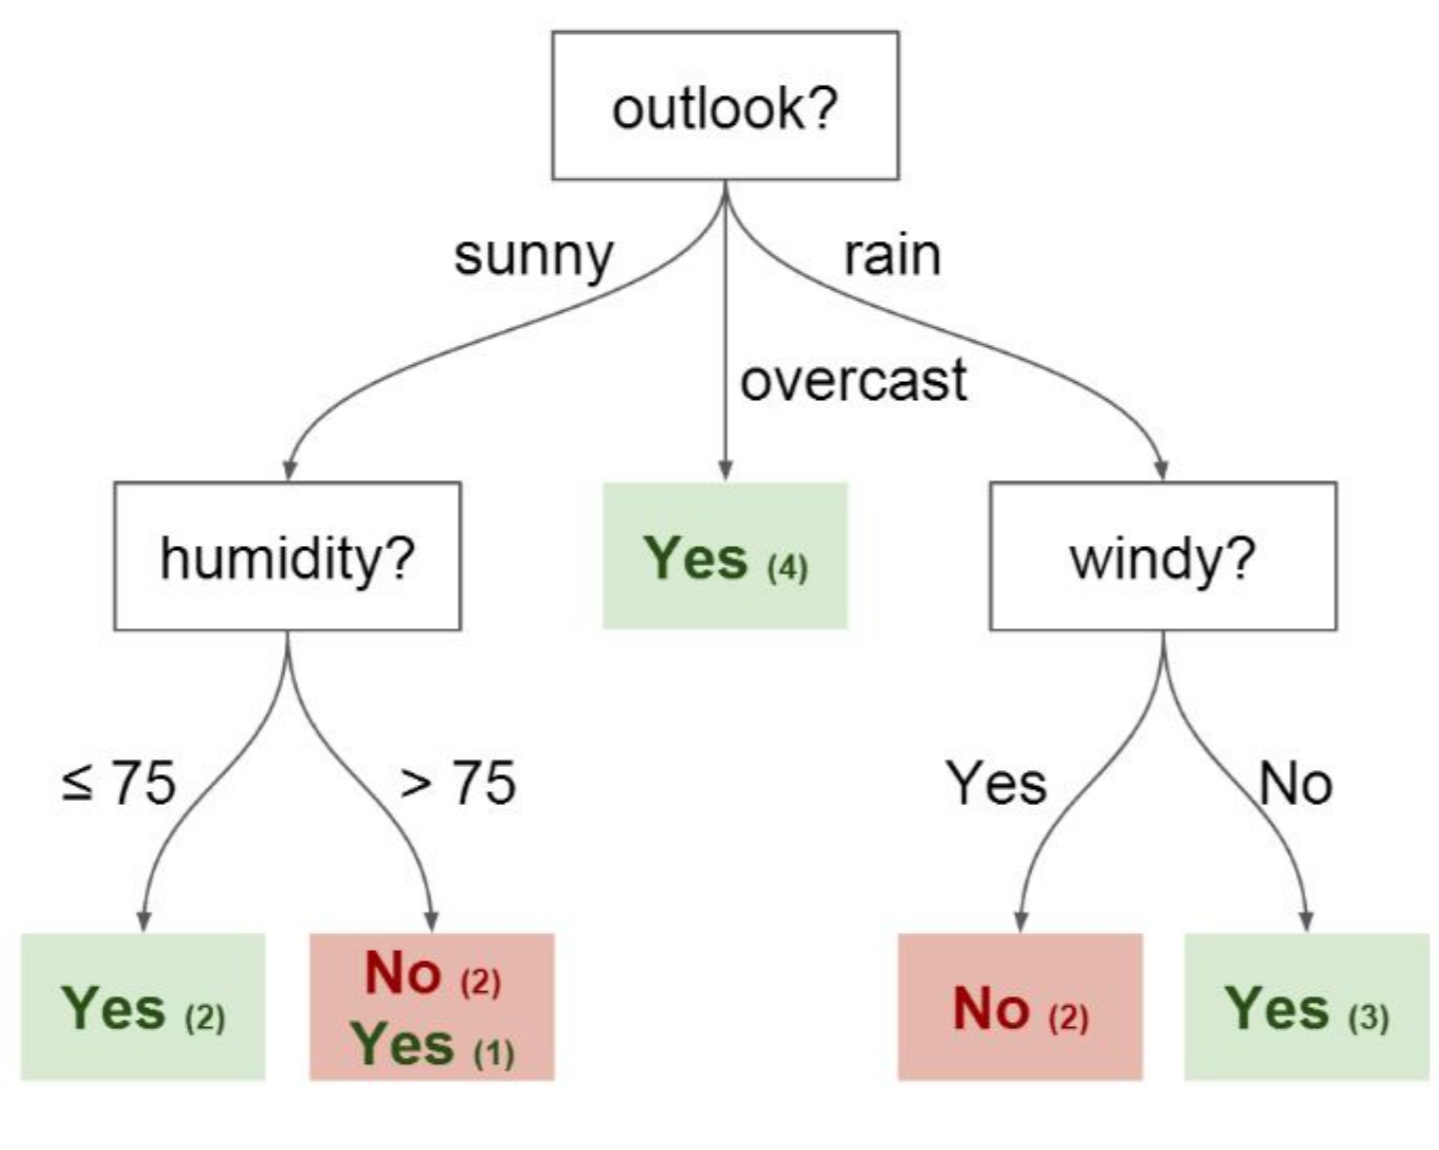

Decision Trees are an important type of algorithm for predictive modeling machine learning.

The classical decision tree algorithms have been around for decades and modern variations like random forest are among the most powerful techniques available.

Classification and Regression Trees or `CART` for short is a term introduced by `Leo Breiman` to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

Classically, this algorithm is referred to as “`decision trees`”, but on some platforms like R they are referred to by the more modern term CART.

The `CART` algorithm provides a foundation for important algorithms like `bagged decision trees`, `random forest` and `boosted decision trees`.

### CART Model Representation
The representation for the CART model is a binary tree.

This is your binary tree from algorithms and data structures, nothing too fancy. Each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

Given a new input, the tree is traversed by evaluating the specific input started at the root node of the tree.

#### Some **advantages** of decision trees are:
* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation. 
* Able to handle both numerical and categorical data.
* Possible to validate a model using statistical tests. 
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

#### The **disadvantages** of decision trees include:
* Overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable. Mitigant: Use decision trees within an ensemble.
* Cannot guarantee to return the globally optimal decision tree. Mitigant: Training multiple trees in an ensemble learner
* Decision tree learners create biased trees if some classes dominate. Recommendation: Balance the dataset prior to fitting

## 2. Random Forest
Random Forest is one of the most popular and most powerful machine learning algorithms. It is a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging.

To improve performance of Decision trees, we can use many trees with a random sample of features chosen as the split.

# Decision Tree & Random Forest Implementation in python

We will use Decision Tree & Random Forest in Predicting the attrition of your valuable employees.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 1. Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [6]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [7]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [8]:
df['Attrition'] = df.Attrition.astype("category").cat.codes

## 2. Data Visualisation

In [9]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

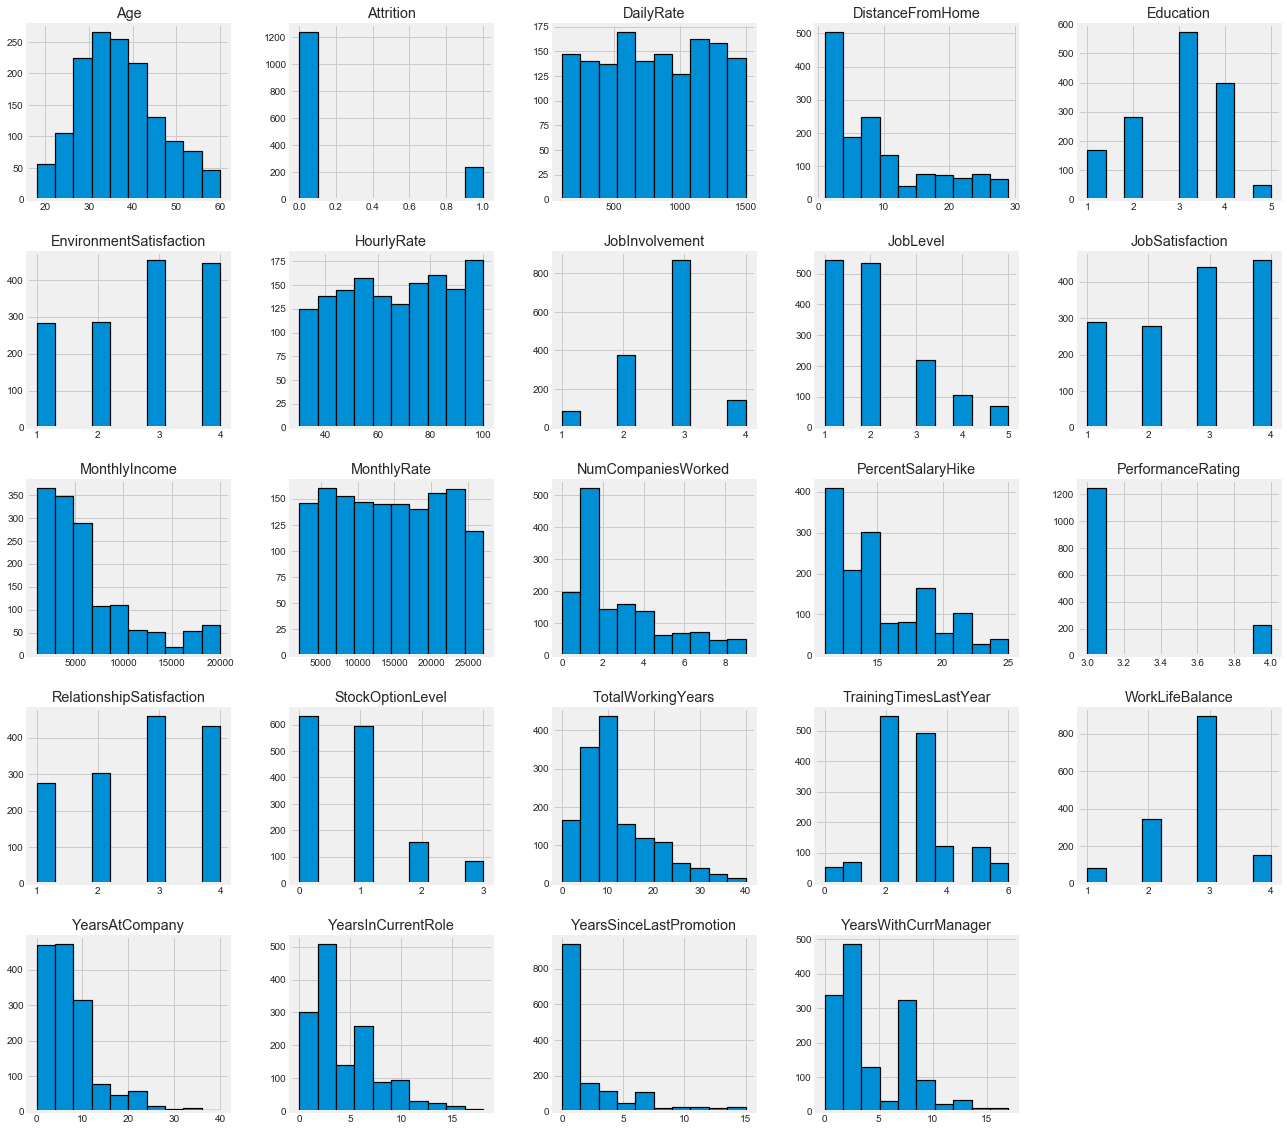

In [10]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

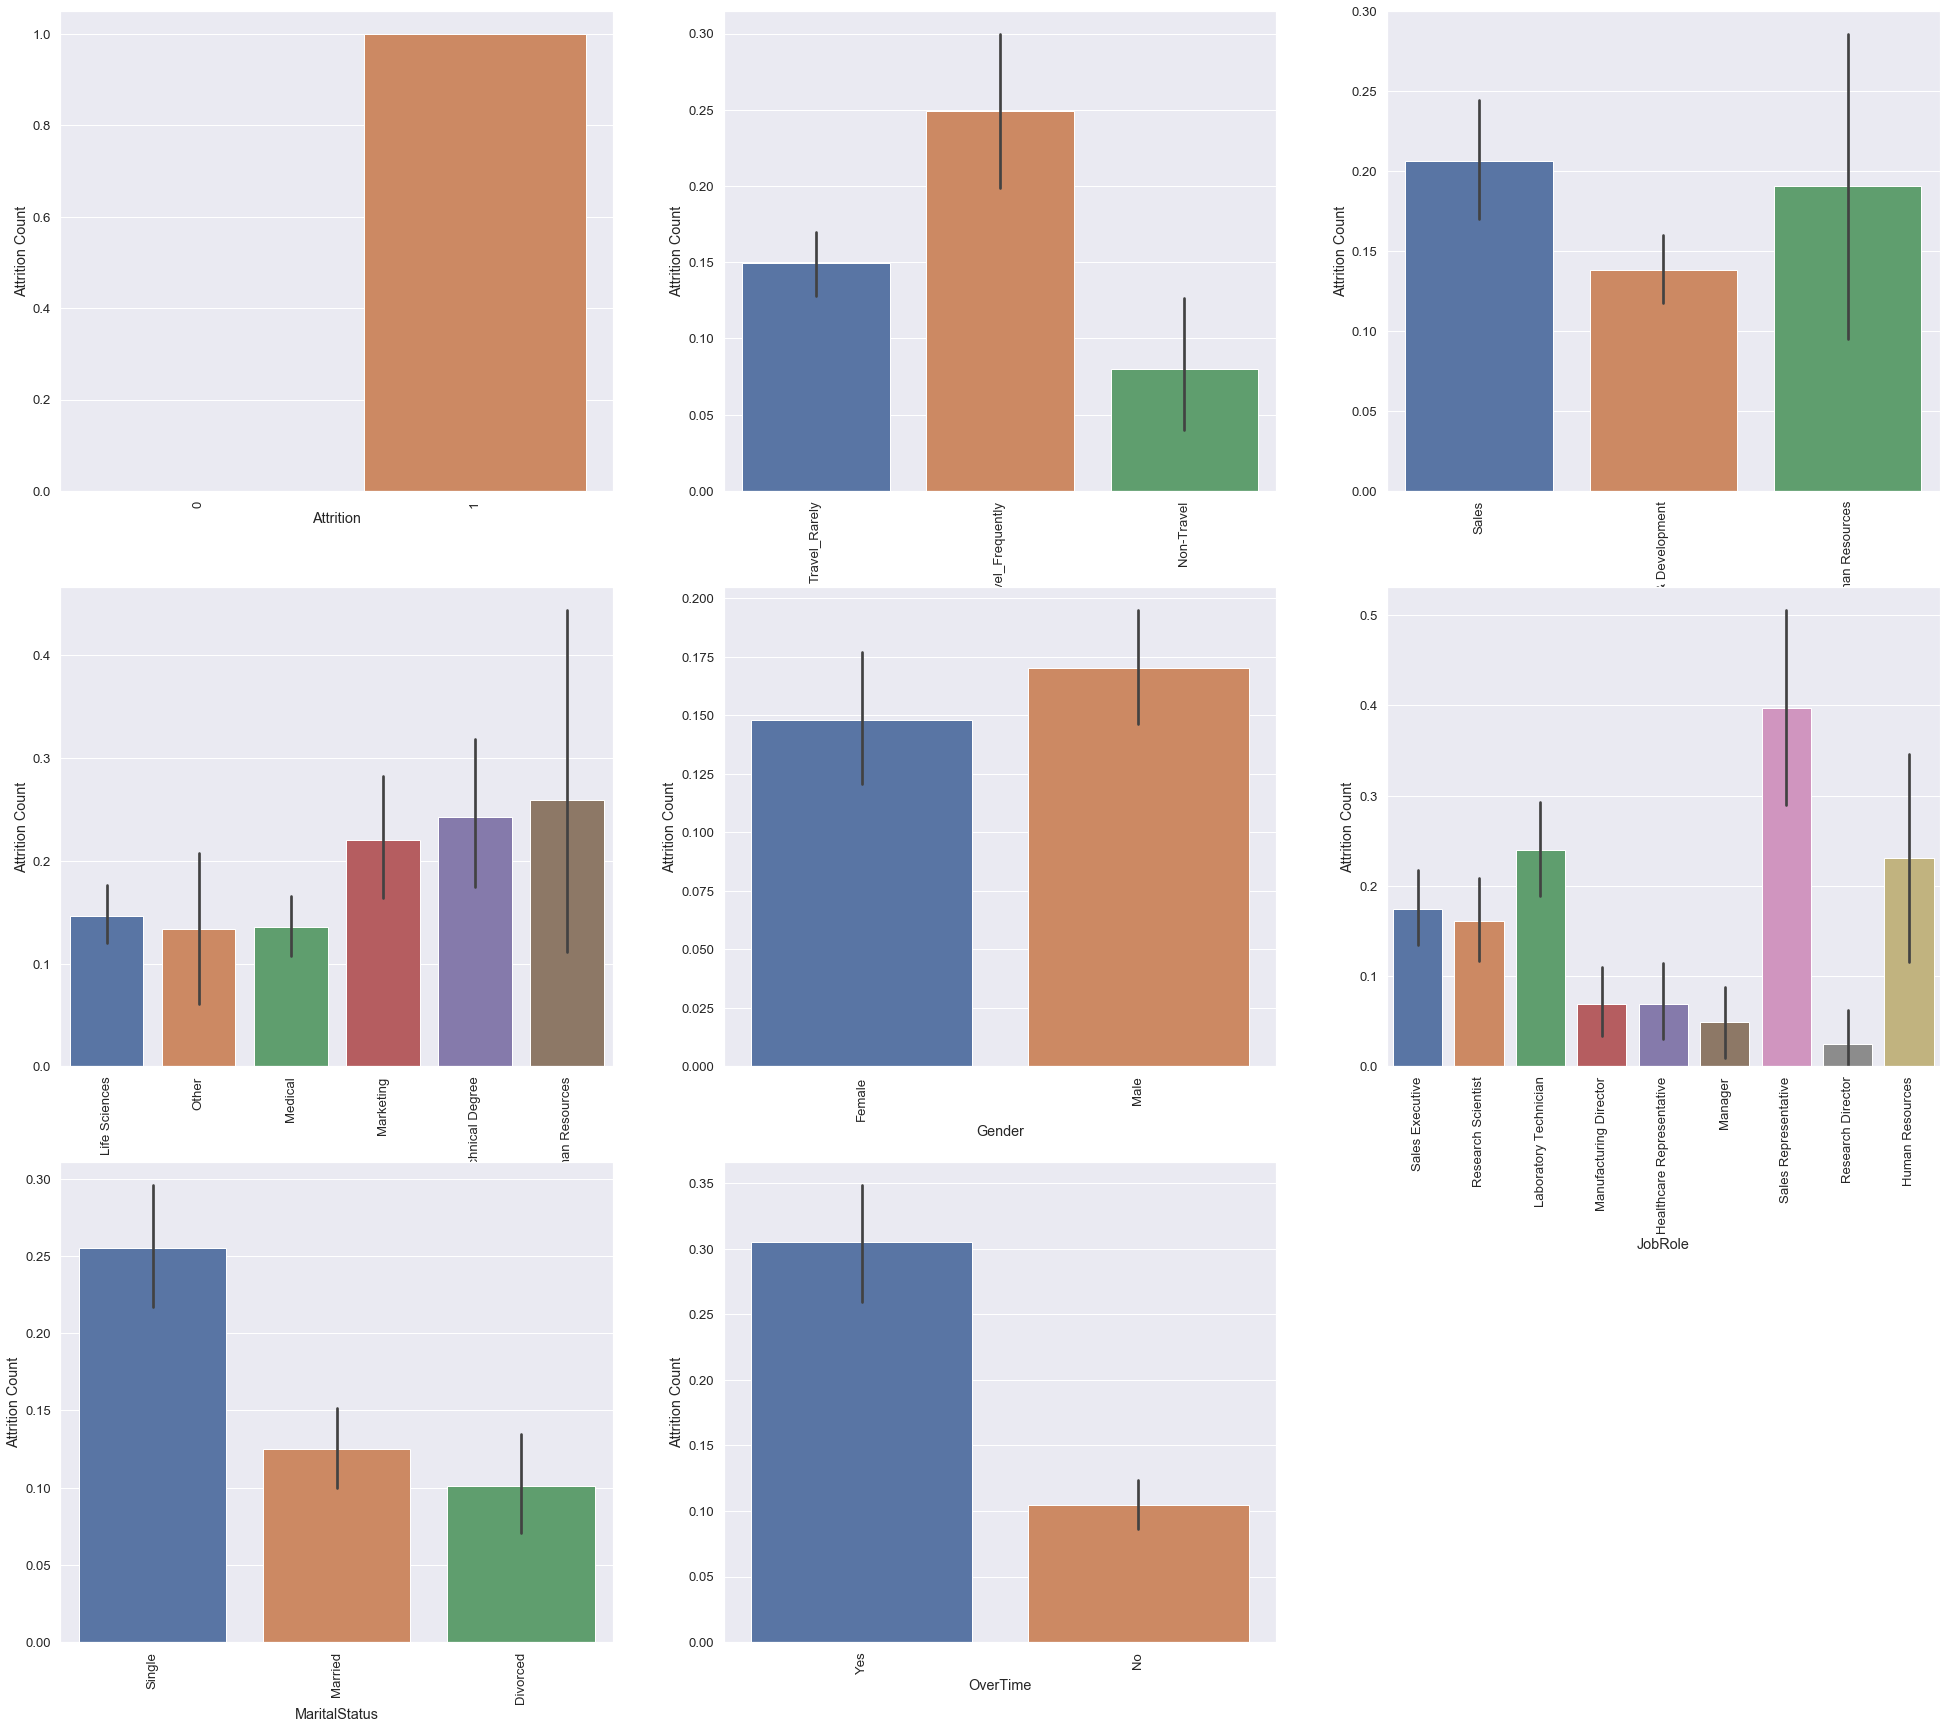

In [11]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

**Conclusions:**

***
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

*** 

## 3. Correlation Matrix

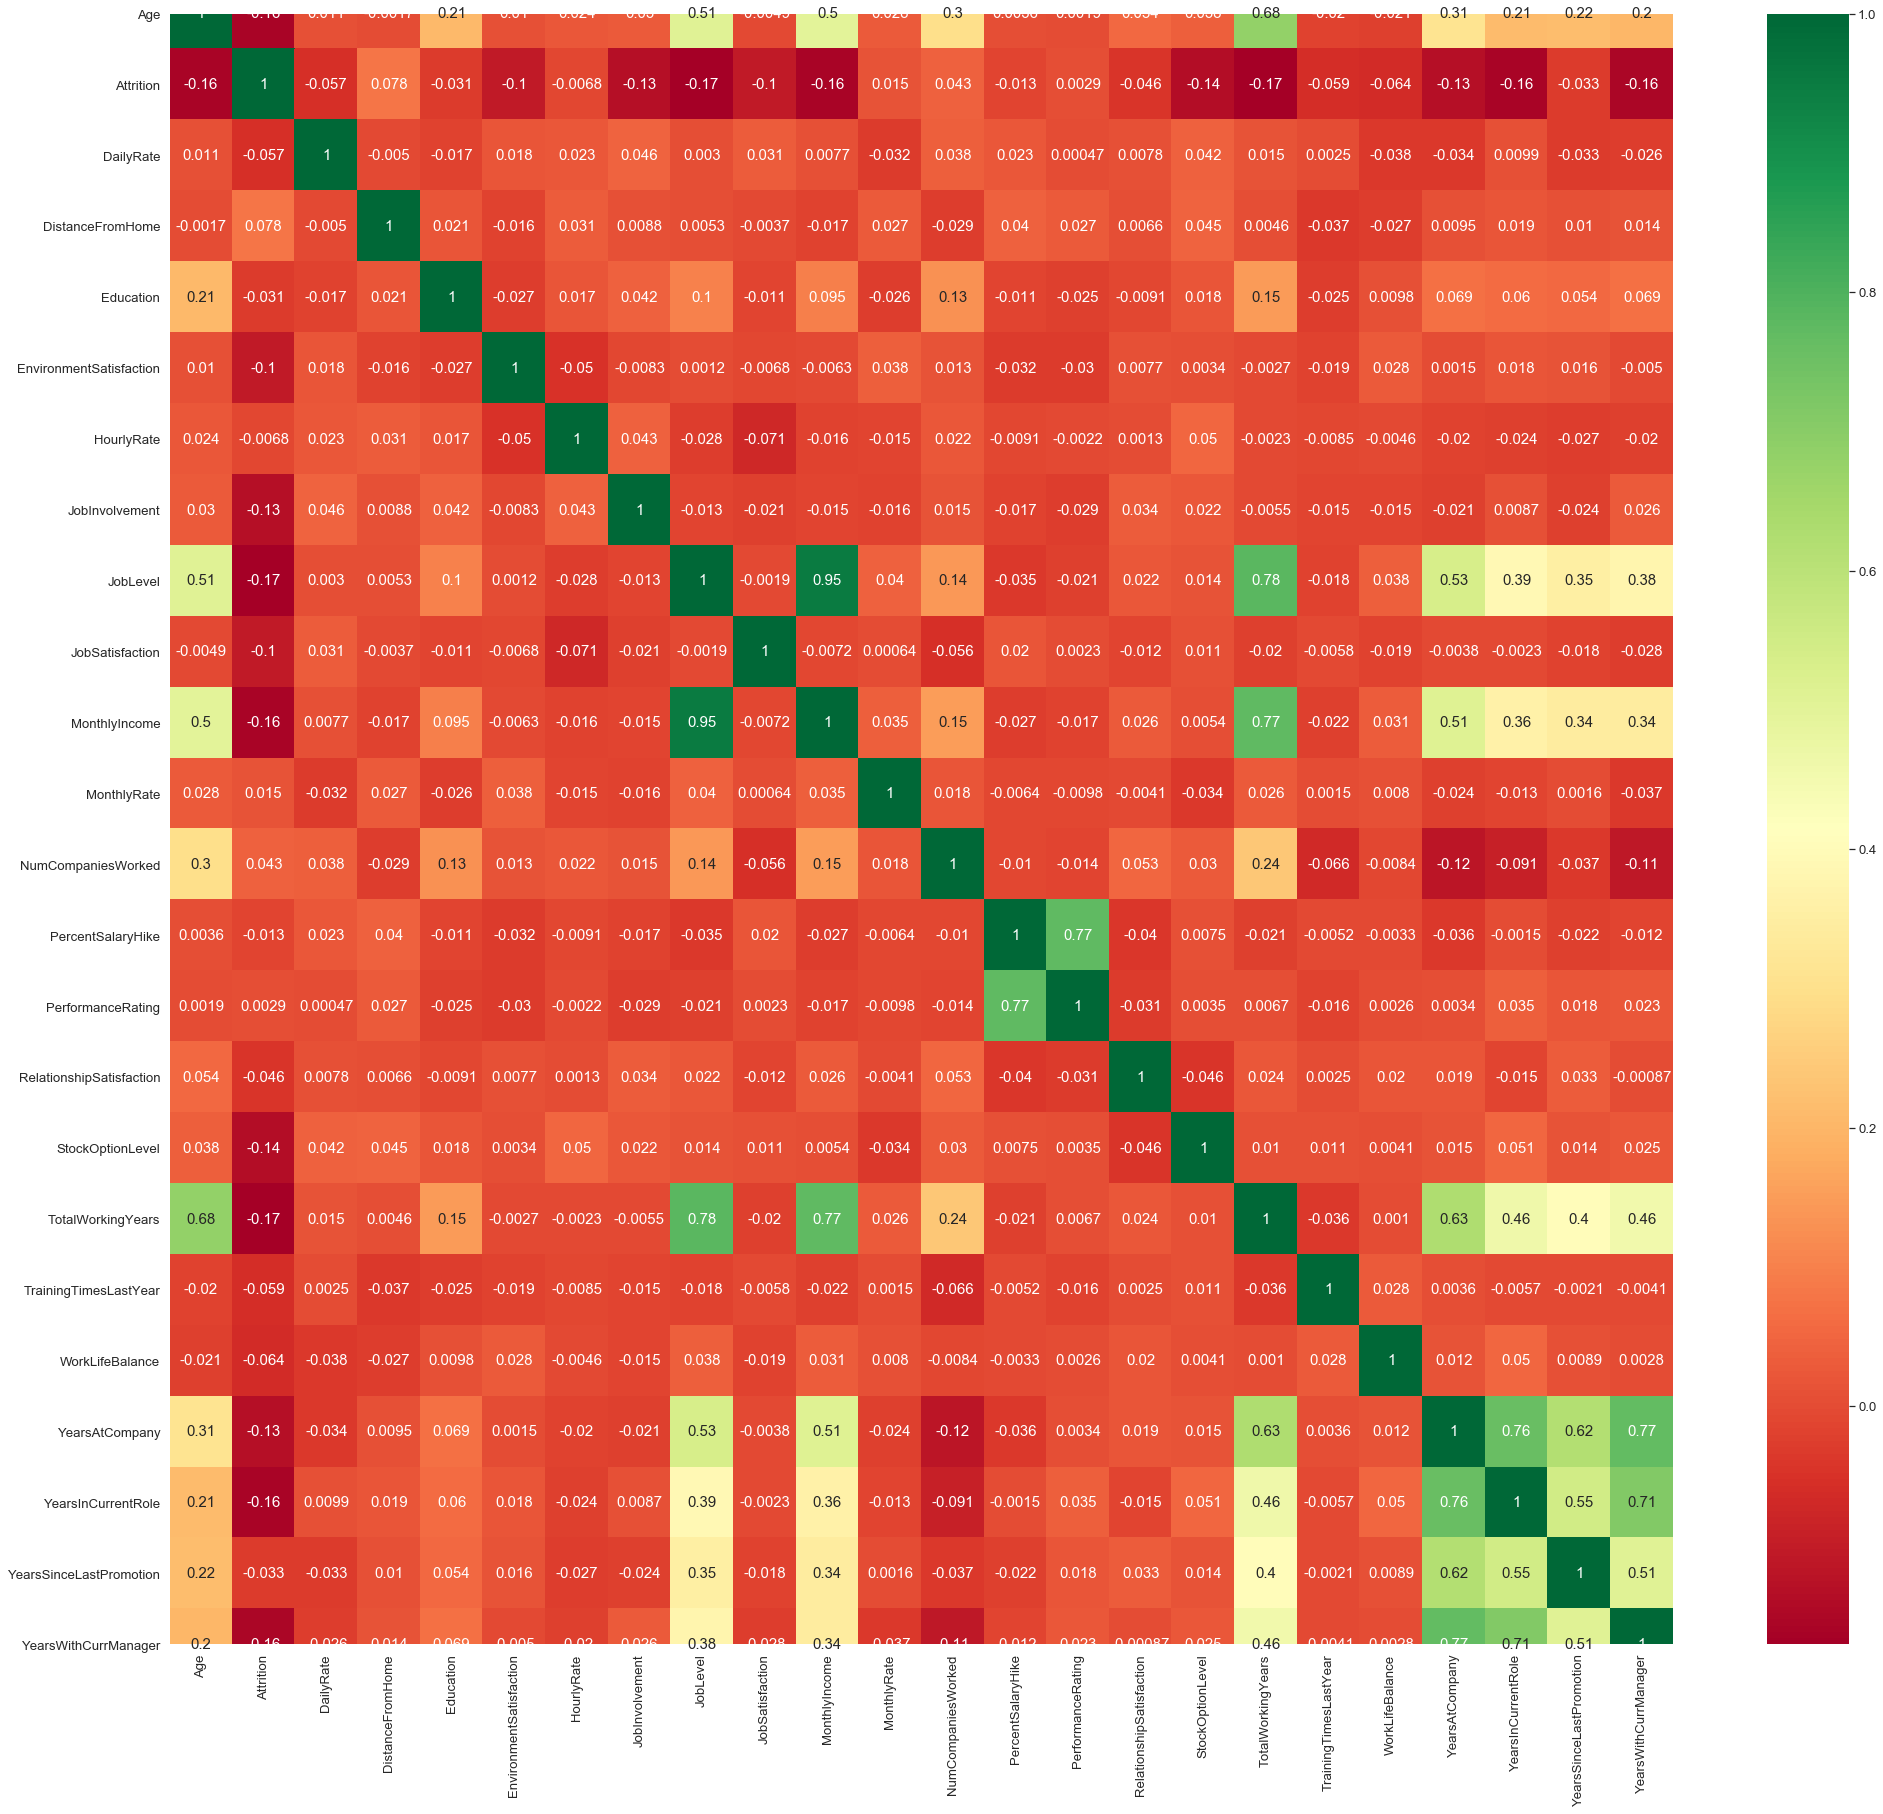

In [12]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

## 4. Data Processing

In [13]:
categorical_col.remove('Attrition')

In [14]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [15]:
X = df.drop('Attrition', axis=1)
y = df.Attrition

## 5. Applying machine learning algorithms

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 5. 1. Decision Tree Classifier

**Decision Tree parameters:**
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `splitter`: The strategy used to choose the split at each node. Supported strategies are "`best`" to choose the best split and "`random`" to choose the best random split.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
accuracy score: 0.7777777777777778

Classification Report: 
 	Precision: 0.2597402597402597
	Recall Score: 0.32786885245901637
	F1 score: 0.28985507246376807

Confusion Matrix: 
 [[323  57]
 [ 41  20]]



### 5. 2. Decision Tree Classifier Hyperparameter tuning

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

# grid_search_cv.fit(X_train, y_train)

In [20]:
# grid_search_cv.best_estimator_

In [24]:
tree = DecisionTreeClassifier(class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='auto',
                       random_state=42, splitter='best')

In [25]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='auto',
                       random_state=42, splitter='best')

In [26]:
print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8882

Classification Report: 
 	Precision: 0.7520661157024794
	Recall Score: 0.5170454545454546
	F1 score: 0.6127946127946129

Confusion Matrix: 
 [[823  30]
 [ 85  91]]

Test Result:
accuracy score: 0.854875283446712

Classification Report: 
 	Precision: 0.46153846153846156
	Recall Score: 0.29508196721311475
	F1 score: 0.36000000000000004

Confusion Matrix: 
 [[359  21]
 [ 43  18]]



### 5. 3. Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

- **Random forest algorithm parameters:**
- `n_estimators`: The number of trees in the forest.
*** 
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
***
- `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
***
- `oob_score`: Whether to use out-of-bag samples to estimate the generalization accuracy.

In [28]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
accuracy score: 0.8662131519274376

Classification Report: 
 	Precision: 0.6
	Recall Score: 0.09836065573770492
	F1 score: 0.16901408450704225

Confusion Matrix: 
 [[376   4]
 [ 55   6]]



### 5. 4. Random Forest hyperparameter tuning

### a) Randomized Search Cross Validation

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


# rf_random.fit(X_train, y_train)

In [30]:
# rf_random.best_estimator_

In [33]:
rand_forest = RandomForestClassifier(bootstrap=False, class_weight=None,
                       criterion='gini', max_depth=80, max_features='sqrt',
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=80, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
accuracy score: 0.8594104308390023

Classification Report: 
 	Precision: 0.45454545454545453
	Recall Score: 0.08196721311475409
	F1 score: 0.13888888888888887

Confusion Matrix: 
 [[374   6]
 [ 56   5]]



`Random search` allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with `GridSearchCV`, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.

### b) Grid Search Cross Validation

In [35]:
param_grid = {'max_depth':[50, 60, 75], 
              'n_estimators':[1400, 1425, 1450],
              'max_features':['sqrt'],
              'min_samples_split':[4, 5, 6], 
              'min_samples_leaf':[1], 
              'bootstrap':[ False], 
              'criterion':["gini"]}

rand_frst_clf = RandomForestClassifier(random_state=42, n_estimators=1000)

grid_rand_forest = GridSearchCV(rand_frst_clf, param_grid, scoring="accuracy", 
                                n_jobs=-1, verbose=1, cv=3)

In [40]:
rand_forest = RandomForestClassifier(bootstrap=False, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
accuracy score: 0.8616780045351474

Classification Report: 
 	Precision: 0.5
	Recall Score: 0.09836065573770492
	F1 score: 0.1643835616438356

Confusion Matrix: 
 [[374   6]
 [ 55   6]]



Feature ranking:
1. feature 15 (0.088954)
2. feature 18 (0.069181)
3. feature 0 (0.065820)
4. feature 23 (0.054077)
5. feature 2 (0.052532)
6. feature 16 (0.047497)
7. feature 9 (0.045129)
8. feature 4 (0.045122)
9. feature 26 (0.042847)
10. feature 17 (0.039609)
11. feature 22 (0.036397)
12. feature 19 (0.031098)
13. feature 29 (0.030792)
14. feature 27 (0.029591)
15. feature 14 (0.029546)
16. feature 12 (0.027974)
17. feature 7 (0.026278)
18. feature 28 (0.025646)
19. feature 13 (0.025635)
20. feature 24 (0.025533)
21. feature 6 (0.023009)
22. feature 21 (0.021832)
23. feature 11 (0.021637)
24. feature 10 (0.020079)
25. feature 25 (0.019781)
26. feature 5 (0.017871)
27. feature 3 (0.013194)
28. feature 1 (0.011085)
29. feature 8 (0.008735)
30. feature 20 (0.003518)


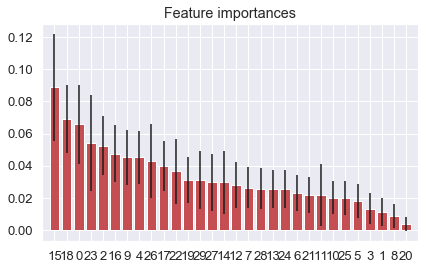

In [42]:
importances = rand_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Summary
In this notebook we learned the following lessons:
- Decsion tree and random forest algorithms and the parameters of each algorithm.
- How to tune hyperparameters for both Decision tree and Random Forest.
- Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. 
  - By sampling an equal number of samples from each class  
  - By normalizing the sum of the sample weights (sample_weight) for each class to the same value. 

  
## References:
- [Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
- [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
- [Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)
- [Bagging and Random Forest Ensemble Algorithms for Machine Learning](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/)